# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 5 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Каждая задача оценивается в 10 баллов.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [22]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [23]:
N = 1e4  # use this
THETA = 1 # default value

random_vals = sps.uniform.rvs(scale = THETA, size = int(N))


Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Отдельно посчитаю значения $\overline{X}, \; X_{(n)}, \; X_{(1)}$ для каждого возможного n. Запишу их в переменные sample_mean, max_value и min_value соотвественно. С помощью этих значений я смогу посчитать все необходимые оценки.

In [24]:
sample_mean = np.cumsum(random_vals) / (np.arange(N) + 1)
max_value = np.maximum.accumulate(random_vals)
min_value = np.minimum.accumulate(random_vals)

first_estimation = 2*sample_mean
second_estimation = sample_mean + 0.5*max_value
third_estimation = min_value*(np.arange(N) + 2)
fourth_estimation = min_value + max_value
fifth_estimation = max_value*(1 + 1/(np.arange(N) + 1))

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

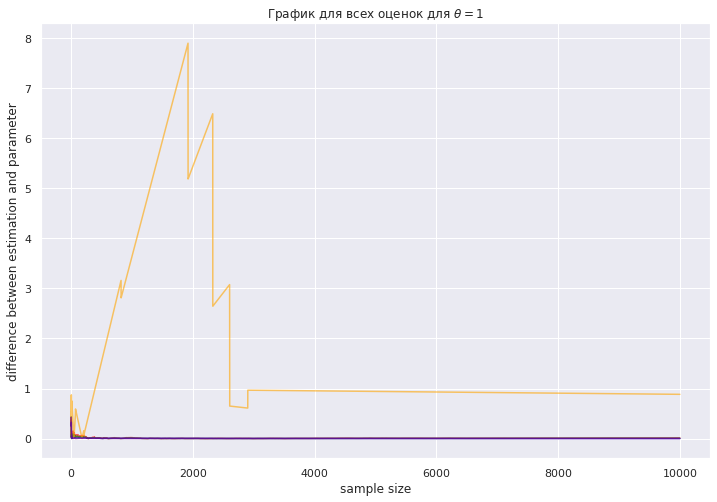

In [25]:
plt.figure(figsize=(12,8))
plt.title("График для всех оценок для $\\theta = 1$")
plt.plot(np.arange(N) + 1, np.absolute(first_estimation - THETA), alpha=0.6, color="red")
plt.plot(np.arange(N) + 1, np.absolute(second_estimation - THETA), alpha=0.6, color="green")
plt.plot(np.arange(N) + 1, np.absolute(third_estimation - THETA), alpha=0.6, color="orange")
plt.plot(np.arange(N) + 1, np.absolute(fourth_estimation - THETA), alpha=0.6, color="blue")
plt.plot(np.arange(N) + 1, np.absolute(fifth_estimation - THETA), alpha=0.6, color="purple")
plt.xlabel("sample size")
plt.ylabel("difference between estimation and parameter")
plt.show()

Можно заметить что третья оценка ооочень сильно отличается от истинного значения $\theta$.
Уберем ее и ограничим график сверху.

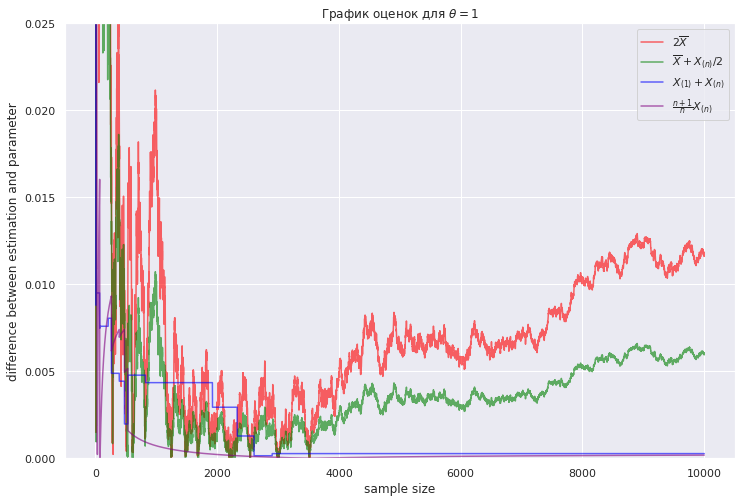

In [26]:
plt.figure(figsize=(12,8))
plt.title("График оценок для $\\theta = 1$")

plt.plot(np.arange(N) + 1, np.absolute(first_estimation - THETA), 
         alpha=0.6, color="red", label='$2\overline{X}$')
plt.plot(np.arange(N) + 1, np.absolute(second_estimation - THETA), 
         alpha=0.6, color="green", label='$\overline{X} + X_{(n)}/2$')
plt.plot(np.arange(N) + 1, np.absolute(fourth_estimation - THETA), 
         alpha=0.6, color="blue", label='$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(N) + 1, np.absolute(fifth_estimation - THETA), 
         alpha=0.6, color="purple", label='$\\frac{n+1}{n} X_{(n)}$')

plt.ylim(0, 0.025)
plt.legend()
plt.xlabel("sample size")
plt.ylabel("difference between estimation and parameter")
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ 

По графику видно, что самой лучшей оценкой будет $\frac{n+1}{n} X_{(n)}$

Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

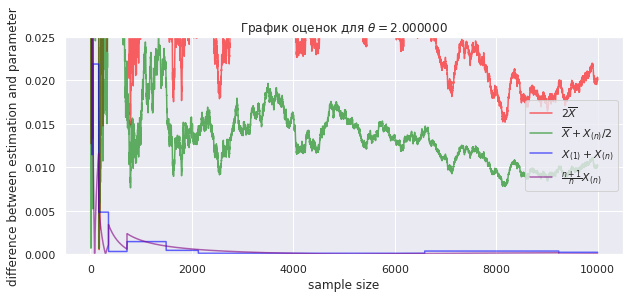

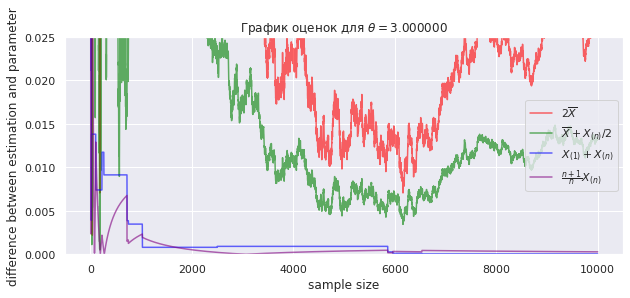

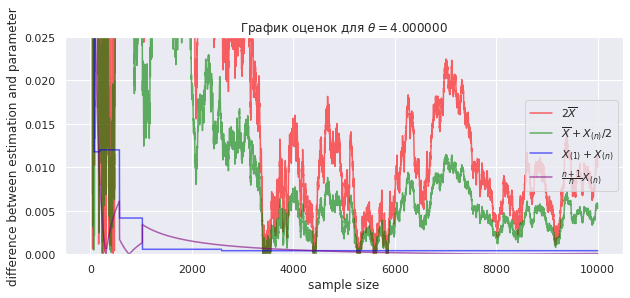

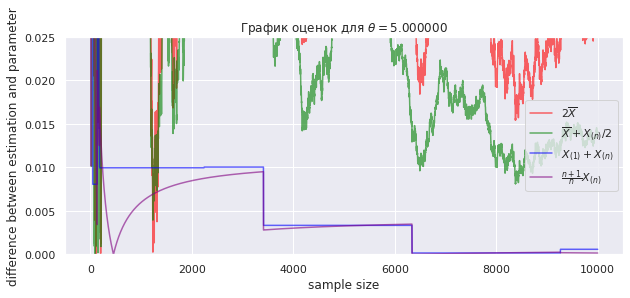

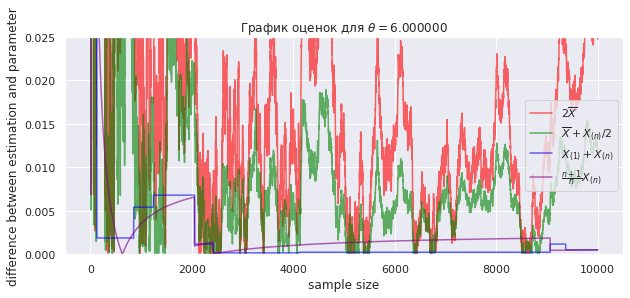

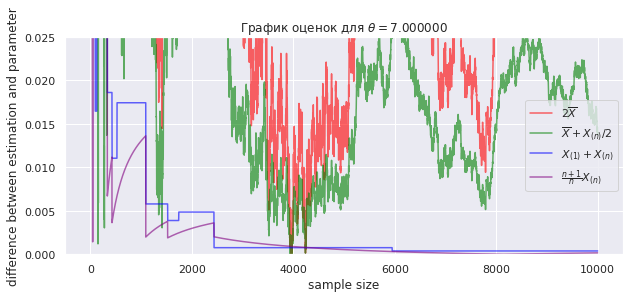

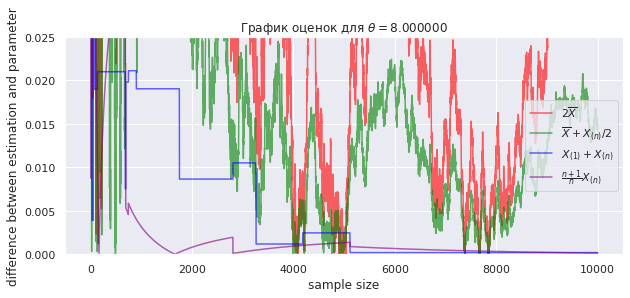

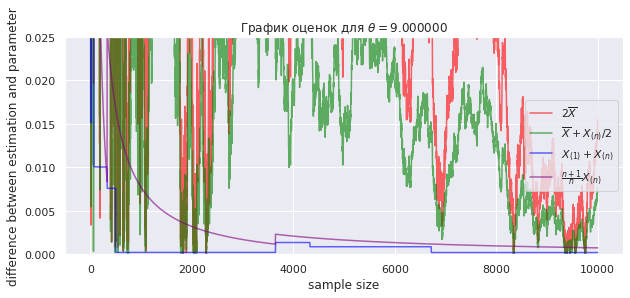

In [51]:
arr_of_thetas = np.arange(2, 10, 1)
for theta in arr_of_thetas:
    # Создаем набор случайных значений при новом тета
    random_vals = sps.uniform.rvs(scale = theta, size = int(N))
    
    # Пересчитываем функции с помощью которых мы посчитаем оценки
    sample_mean = np.cumsum(random_vals) / (np.arange(N) + 1)
    max_value = np.maximum.accumulate(random_vals)
    min_value = np.minimum.accumulate(random_vals)

    # Считаем оценки
    first_estimation = 2*sample_mean
    second_estimation = sample_mean + 0.5*max_value
    third_estimation = min_value + max_value
    fourth_estimation = max_value*(1 + 1/(np.arange(N) + 1))
    
    # А теперь делаем график для наших оценок конкретной теты
    plt.figure(figsize=(10, 4))
    plt.title("График оценок для $\\theta = %f$" %theta)
    
    plt.plot(np.arange(N) + 1, np.absolute(first_estimation - theta), 
             alpha=0.6, color="red", label='$2\overline{X}$')
    plt.plot(np.arange(N) + 1, np.absolute(second_estimation - theta), 
             alpha=0.6, color="green", label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.arange(N) + 1, np.absolute(third_estimation - theta), 
             alpha=0.6, color="blue", label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(N) + 1, np.absolute(fourth_estimation - theta), 
             alpha=0.6, color="purple", label='$\\frac{n+1}{n} X_{(n)}$')
    
    plt.ylim(0, 0.025)
    plt.legend(loc = 'right')
    plt.xlabel("sample size")
    plt.ylabel("difference between estimation and parameter")
    plt.show()

Сделайте вывод.


__Вывод:__ В большинстве случаев оценки $\frac{n+1}{n} X_{(n)}$ хватает. Так же заметно что оценка $X_{(1)}+X_{(n)}$ тоже хорошо оценивает параметр $\theta$, а в некоторых случаях оценивает его даже лучше чем $\frac{n+1}{n} X_{(n)}$

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [28]:
N = 10000
THETA = 1
random_vals = sps.expon.rvs(scale = THETA, size = N)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

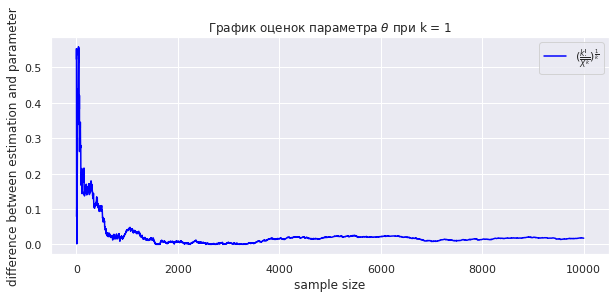

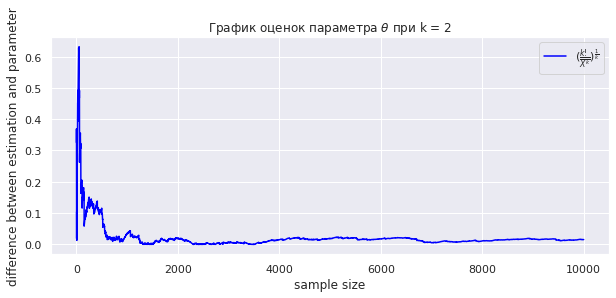

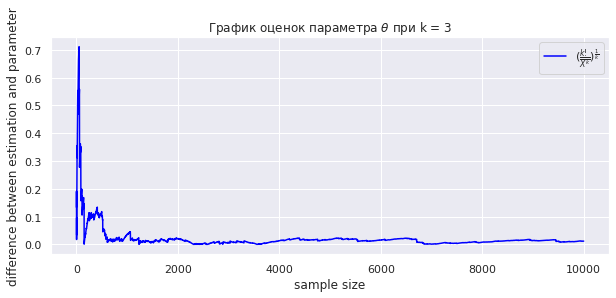

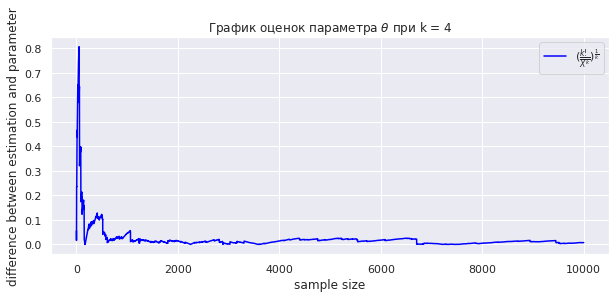

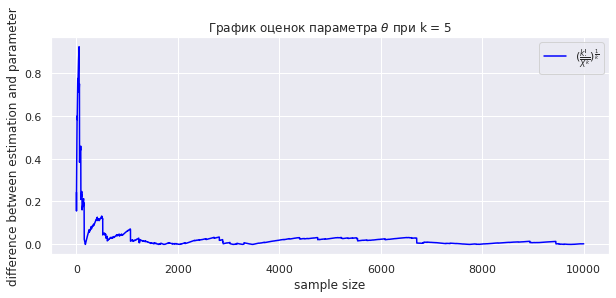

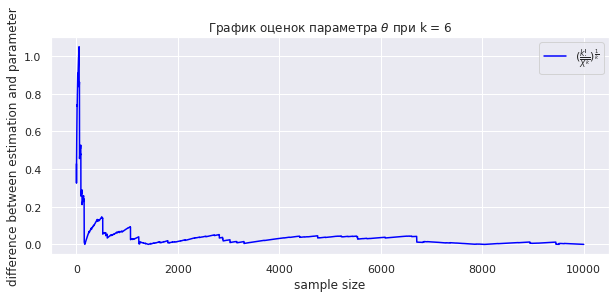

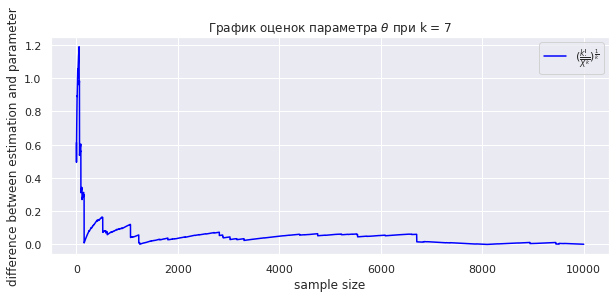

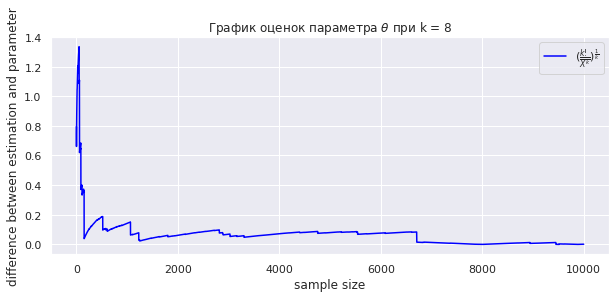

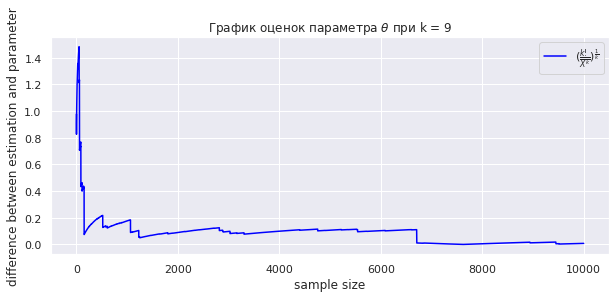

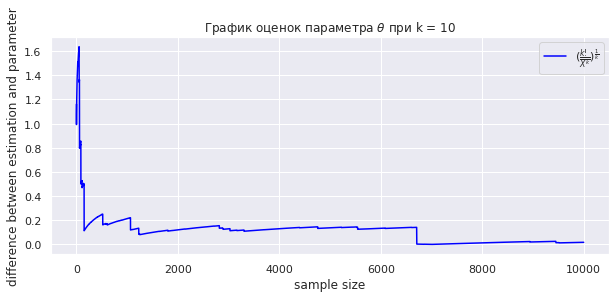

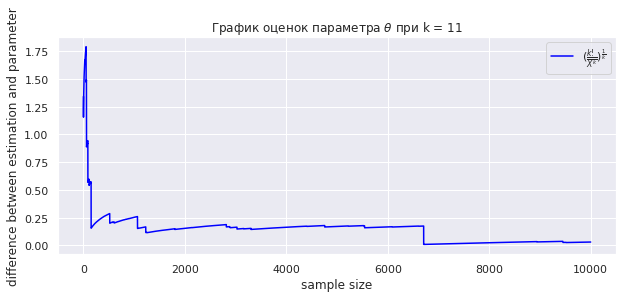

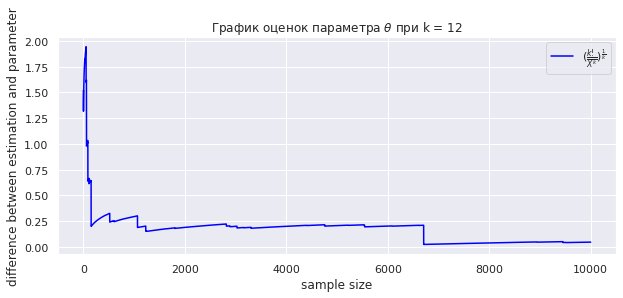

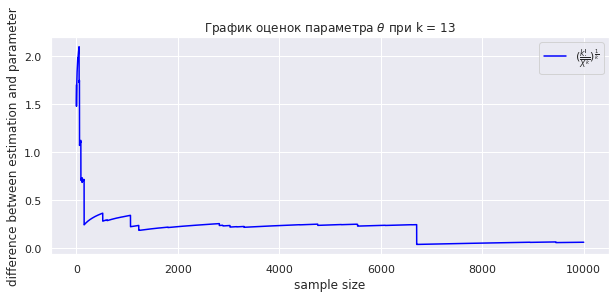

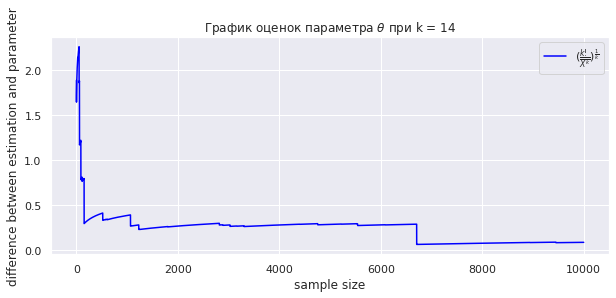

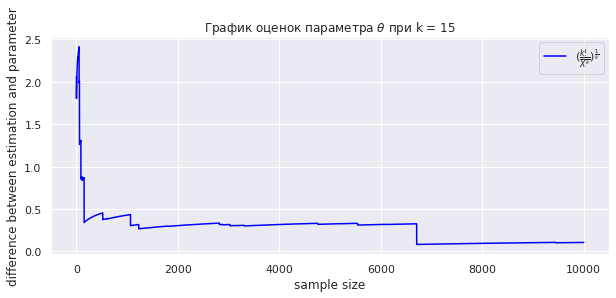

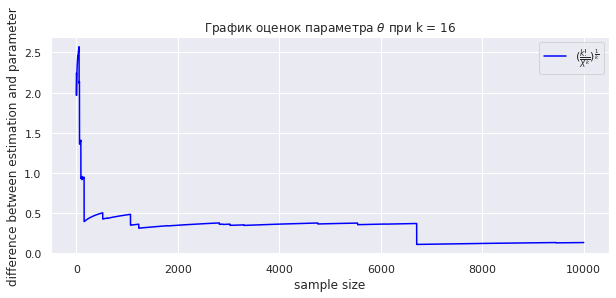

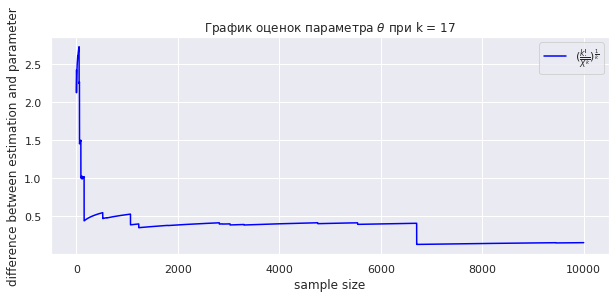

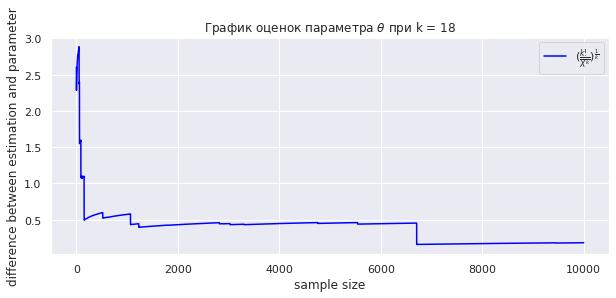

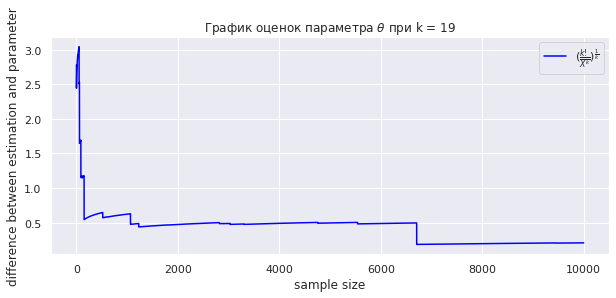

In [30]:
arr_of_k_par = np.arange(1, 20, 1)
for k in arr_of_k_par:
    
    k_factorial = np.full(N, np.math.factorial(k))
    sample_moment_of_k_order = (np.cumsum(random_vals ** k))/ (np.arange(N) + 1)

    fraction = k_factorial / sample_moment_of_k_order
    estimation = np.sign(fraction) * (np.abs(fraction)) ** (1/k)
    
    plt.figure(figsize=(10, 4))
    plt.title("График оценок параметра $\\theta$ при k = %d" %k)
    
    plt.plot(np.arange(N) + 1, np.absolute(estimation - THETA), color="blue", 
             label='$(\\frac{k!}{\overline{X^k}})^\\frac{1}{k} $')
    
    plt.legend(loc = 'upper right')
    plt.xlabel("sample size")
    plt.ylabel("difference between estimation and parameter")
    plt.show()

Сделайте вывод.


__Вывод:__ При больших значениях $k$ функция оценки медленнее оценивает параметр. Так что лучшим значением является $k = 1$

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

In [31]:
N = 10000

Таким распределением, может быть распределение с плотностью $p(x) = \frac{10}{x^6}I(x > 1)$

Проверим:

$\int_{-\infty}^{\infty} x\frac{10}{x^6}I(x > 1)  \,dx$ = $\int_{1}^{\infty} \frac{10}{x^5}\,dx$ = $\frac{5}{2}$

$\int_{-\infty}^{\infty} x^2\frac{10}{x^6}I(x > 1)  \,dx$ = $\int_{1}^{\infty} \frac{10}{x^4}\,dx$ = $\frac{10}{3}$

$\int_{-\infty}^{\infty} x^3\frac{10}{x^6}I(x > 1)  \,dx$ = $\int_{1}^{\infty} \frac{10}{x^3}\,dx$ = 5

$\int_{-\infty}^{\infty} x^4\frac{10}{x^6}I(x > 1)  \,dx$ = $\int_{1}^{\infty} \frac{10}{x^2}\,dx$ = 10

$\int_{-\infty}^{\infty} x^5\frac{10}{x^6}I(x > 1)  \,dx$ = $\int_{1}^{\infty} \frac{10}{x}\,dx$ = $\infty$


In [32]:
# Определили свое распределение с заданной плотностью
class my_dist(sps.rv_continuous):
    def _pdf(self,x):
        if x > 1:
            return 10/(x ** 6)
        else:
            return 0

In [33]:
my_dist_var = my_dist(a=1, name="custom dist")
rand_vars = my_dist_var.rvs(size = N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

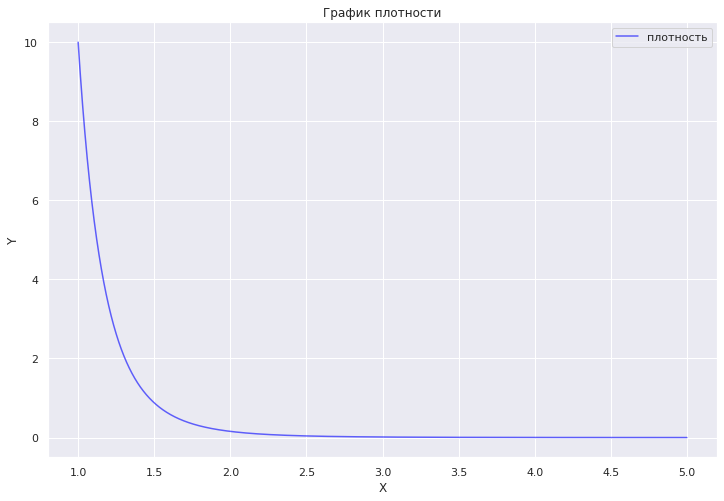

In [34]:
x_vals = np.linspace(1, 5, 10000)
y_vals = np.full(10000, 10) / (x_vals ** 6)

plt.figure(figsize=(12,8))
plt.title("График плотности")
plt.plot(x_vals, y_vals, alpha=0.6, color="blue", label='плотность')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

Оценку буду считать при помощи определения с википедии: $s^2 = \frac{1}{n}\sum_{i=1}^{n} X_{i}^2 - (\frac{1}{n}\sum_{i=1}^{n} X_{i})^2$

Первую сумму посчитаю в переменной first_summ, а вторую в second_summ

In [35]:
first_summ = (np.cumsum(rand_vars ** 2))/ (np.arange(N) + 1)
second_summ = (np.cumsum(rand_vars) / (np.arange(N) + 1)) ** 2
estimation = first_summ - second_summ

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

In [36]:
# Посчитаем и запомним дисперсию
DISPERSION = np.var(rand_vars)

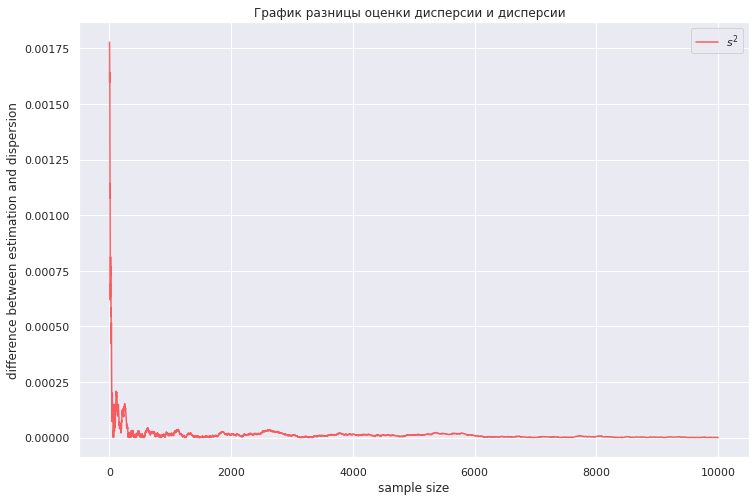

In [37]:
plt.figure(figsize=(12,8))
plt.title("График разницы оценки дисперсии и дисперсии  ")
plt.plot(np.arange(N) + 1, np.absolute(estimation - DISPERSION), alpha=0.6, color="red", label='$s^2$')
plt.legend()
plt.xlabel("sample size")
plt.ylabel("difference between estimation and dispersion")
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [42]:
cauchy_random_vals = sps.cauchy.rvs(size = N)

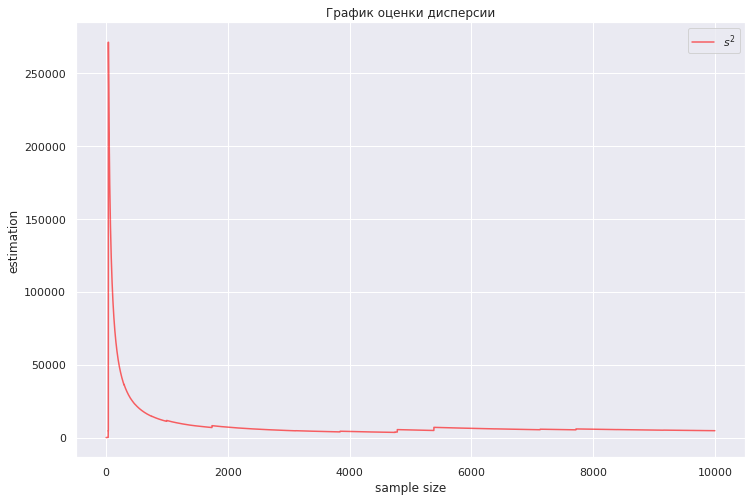

In [43]:
# Посчитаем оценку дисперсии
first_summ = (np.cumsum(cauchy_random_vals ** 2))/ (np.arange(N) + 1)
second_summ = (np.cumsum(cauchy_random_vals) / (np.arange(N) + 1)) ** 2
estimation = first_summ - second_summ

plt.figure(figsize=(12,8))
plt.title("График оценки дисперсии")
plt.plot(np.arange(N) + 1, estimation, alpha=0.6, color="red", label='$s^2$')
plt.legend()
plt.xlabel("sample size")
plt.ylabel("estimation")
plt.show()

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [54]:
N = 10000
random_vals = sps.norm().rvs(N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [55]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdf_for_norm = []
for i in range(1, N + 1):
    ecdf_for_norm.append(ECDF(random_vals[0 : i]))

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

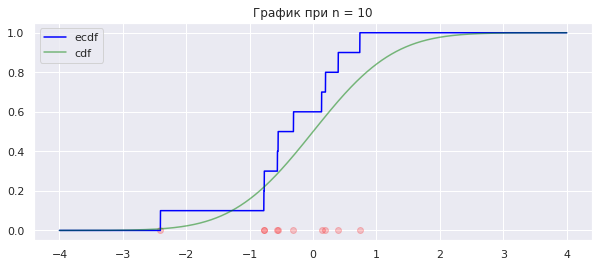

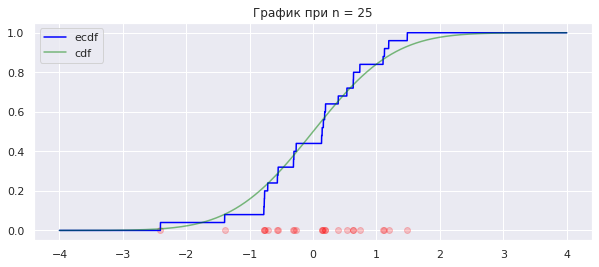

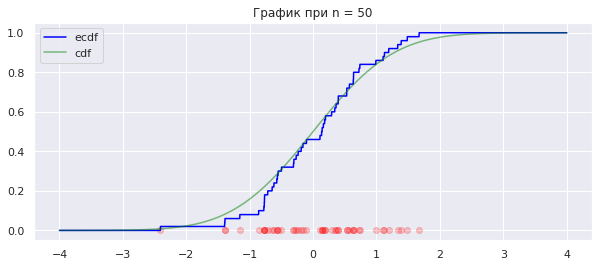

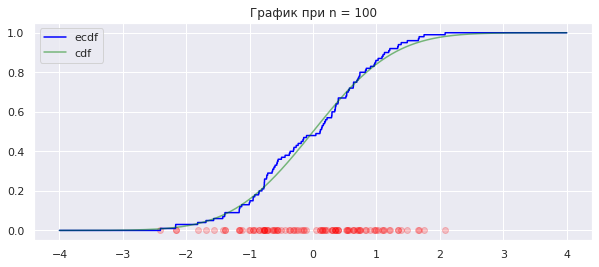

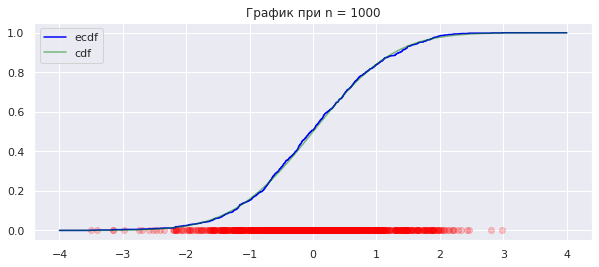

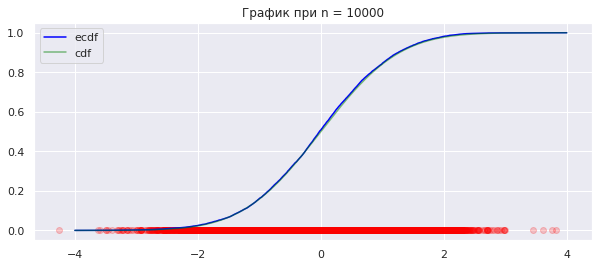

In [57]:
for n in [10, 25, 50, 100, 1000, N]:
    plt.figure(figsize=(10, 4))
    plt.title('График при n = %d' %n)
    plt.plot(np.linspace(-4, 4, 10000), ecdf_for_norm[n - 1](np.linspace(-4, 4, 10000)), 
             color = 'blue', label = 'ecdf')
    plt.plot(np.linspace(-4, 4, 10000), sps.norm.cdf(np.linspace(-4, 4, 10000)), 
             color = 'green', alpha = 0.5, label = 'cdf')
    plt.scatter(random_vals[0 : n], np.zeros(n), color = 'red', alpha = 0.2)
    plt.legend()
    plt.show()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


Как можно понять по уже построенным графикам из предыдущего пункта, нам достаточно рассмотреть значения $x$ на $[-5, 5]$

In [59]:
x = np.linspace(-5, 5, 10000)
real_F_value = sps.norm.cdf(x)
D = []
for i in range(0, N):
    D.append((ecdf_for_norm[i](x) - real_F_value).max())

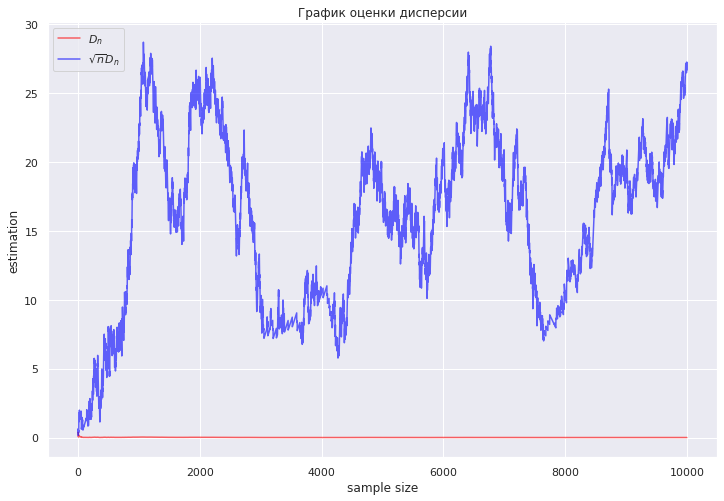

In [58]:
plt.figure(figsize=(12,8))
plt.title("График оценки дисперсии")
plt.plot(np.arange(N) + 1, D, alpha=0.6, color="red", label='$D_{n}$')
plt.plot(np.arange(N) + 1, D * (np.cumsum(np.arange(N) + 1) ** 0.5), 
         alpha=0.6, color="blue", label='$\sqrt{n}D_{n}$')
plt.legend()
plt.xlabel("sample size")
plt.ylabel("estimation")
plt.show()

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

# YOUR CODE GOES HERE

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

In [ ]:
# YOUR CODE GOES HERE

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**:

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

In [ ]:
import statsmodels.api as sm


theta_norm = None  # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

In [ ]:
# YOUR CODE GOES HERE

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.